In [0]:
import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Import matplotlib and see what the data looks like



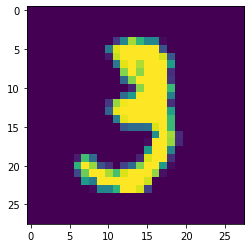

3


In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10]) 
#training image
plt.show()
print(y_train[10]) 
#what the number is supposed to be


Next, we need to break the data down so that the neural network can digest it easier.

In [0]:
#Reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
#Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Then, we convert the y values (numbers) into ones and zeros, making each number categorical. This is called one-hot encoding. Without it, the neural network might categorize numbers based on how they are related numerically rather than how they look. To learn more about one-hot encoding

In [16]:
print(y_train[1])

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


It's time to build the neural network. Each layer is a different type of neuron.

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))


Next, we need to train the network. Feel free to switch around the type optimizer, number of epochs, or batch size. Depending on how fast your GPU is, this model can take some time to train. On the colab GPU, one epoch takes around 2 minutes.

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.fit(x_train, y_train,  batch_size=128,  epochs=1,  validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0910 - accuracy: 0.9729 - val_loss: 0.0413 - val_accuracy: 0.9855


In [23]:















print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 6s 647us/step
[0.04133552264008904, 0.9854999780654907]


Finally, run the model on the test data and print the results. The first number is the loss and the second number is the accuracy out of 1.

In [24]:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 7s 656us/step
[0.04133552264008904, 0.9854999780654907]
